In [23]:
import torch
import pandas as pd
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv("data_final2.csv")

In [25]:
df

,File name,Total bytes,0x00,0x01,0x02,0x03,0x04,0x05,0x06,0x07,...,0xF8,0xF9,0xFA,0xFB,0xFC,0xFD,0xFE,0xFF,virus_label,Numerical label
0,VirusShare_13c0c348720924116868683738a23f45,152064,0.146221,0.004702,0.003623,0.003683,0.004169,0.003617,0.003045,0.003229,...,0.003709,0.002749,0.002749,0.003189,0.004682,0.002986,0.003025,0.005044,renos,2
1,VirusShare_7b32a9728485488342061db145d7379f,222720,0.147261,0.010677,0.003740,0.003529,0.003951,0.003722,0.003511,0.009393,...,0.004611,0.002905,0.002716,0.002865,0.003516,0.002811,0.003112,0.012473,winwebsec,1
2,VirusShare_d86c5410e2496501f593b5dc91c48481,395264,0.088240,0.007572,0.004516,0.004622,0.004030,0.003261,0.003281,0.007888,...,0.003724,0.003448,0.003739,0.003319,0.003871,0.003572,0.006016,0.009439,winwebsec,1
3,VirusShare_78bbf404d61bb9b10510d2de8a26a317,152064,0.199212,0.006129,0.003965,0.005971,0.012126,0.003545,0.002709,0.002854,...,0.004117,0.002407,0.001684,0.002538,0.002525,0.002499,0.003341,0.005833,renos,2
4,VirusShare_62b16a42a09b47fc1f9d4b50559b3f76,126976,0.266822,0.016665,0.004836,0.004607,0.013751,0.003237,0.002473,0.002709,...,0.003064,0.002386,0.002260,0.002063,0.002930,0.002182,0.003048,0.028344,ceeinject,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15351,VirusShare_a954f92597d3ea2f57d4baab71524817,970752,0.007705,0.004105,0.003569,0.003765,0.003817,0.003832,0.003806,0.003722,...,0.003576,0.003349,0.003501,0.003444,0.003737,0.003534,0.003956,0.111609,ceeinject,9
15352,VirusShare_23694c47f61a259d69349e0f10c94ac0,412672,0.092822,0.005777,0.003928,0.003693,0.004219,0.003506,0.003598,0.003855,...,0.006288,0.003426,0.003545,0.003584,0.003967,0.003337,0.004170,0.007076,winwebsec,1
15353,VirusShare_b87b673a15047b26457f02e944c7d322,113152,0.093123,0.004622,0.003791,0.004163,0.004065,0.004330,0.003509,0.003261,...,0.003703,0.002961,0.002890,0.003341,0.004012,0.003199,0.003517,0.005267,renos,2
15354,VirusShare_d6d5695b0f9fbc0b22aac68881151813,66128,0.405834,0.002798,0.002556,0.002767,0.002964,0.003418,0.003312,0.003599,...,0.001754,0.001255,0.001195,0.001890,0.001769,0.001497,0.001406,0.002767,onlinegames,3


In [26]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and targets
features = df.iloc[:, 1:-2]  # assuming that your numerical features start from the second column and ends two columns before the last
target = df["Numerical label"]

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Convert to tensors
features = torch.tensor(features, dtype=torch.float)
target = torch.tensor(target.values, dtype=torch.long)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create dataloaders
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batch_size = 64  # You can adjust batch size

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(features.shape[1], 256)  # input layer
        self.fc2 = nn.Linear(256, 128)  # hidden layer
        self.fc3 = nn.Linear(128, len(df['Numerical label'].unique()))  # output layer (number of unique labels)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # dropout layer for regularization

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = Net()

# Define loss function (Cross Entropy Loss used for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the network
for epoch in range(10):  # number of epochs can be adjusted
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Compute accuracy on the test data at the end of each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1} / {10}, Accuracy: {accuracy}%')



Epoch 1 / 10, Accuracy: 83.10546875%
Epoch 2 / 10, Accuracy: 83.59375%
Epoch 3 / 10, Accuracy: 86.65364583333333%
Epoch 4 / 10, Accuracy: 87.85807291666667%
Epoch 5 / 10, Accuracy: 88.05338541666667%
Epoch 6 / 10, Accuracy: 89.09505208333333%
Epoch 7 / 10, Accuracy: 89.61588541666667%
Epoch 8 / 10, Accuracy: 90.16927083333333%
Epoch 9 / 10, Accuracy: 89.97395833333333%
Epoch 10 / 10, Accuracy: 90.72265625%


In [27]:
import struct

def float_to_binary(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

def binary_to_float(binary):
    return struct.unpack('!f', struct.pack('!I', int(binary, 2)))[0]


In [28]:
def modify_weight_bit(model, layer_index, bit_index, new_bit, start_bit):
    nbl = start_bit

    # Access the weights of the specified layer
    layers = list(model.children())
    layer = layers[layer_index]
    weights = layer.weight.data.numpy()


    for wloc in range(len(weights)):
        w = weights[wloc]
        # Unravel weights to make it 1D
        weight_array = np.ravel(w)
        # Convert the weight to a fixed-point representation
        fixed_point_weight = weight_array
        for ind in range(len(fixed_point_weight)):
            # Convert the weights to a binary string
            binary_weight = float_to_binary(fixed_point_weight[ind])
            # Convert the binary string to a list of characters
            binary_list = list(binary_weight)
            # Modify the specified bit to the new bit value
            i = 0
            while i < bit_index:
                binary_list[-i-1] = str(new_bit[(nbl % len(new_bit))])
                nbl += 1
                i += 1
            # Convert the modified binary list back to a string
            modified_binary_weight = ''.join(binary_list)

            # Convert the modified binary weights back to fixed-point representation
            modified_fixed_point_weight = binary_to_float(modified_binary_weight)
            # Update the weight array with the modified weight
            weight_array[ind] = modified_fixed_point_weight
        weight_array = weight_array.reshape(w.shape)
        weights[wloc] = weight_array

    # Set the modified weights back to the layer
    layer.weight.data = torch.from_numpy(weights).float()

    return model, nbl

# Modify the model's weights
model, nbl = modify_weight_bit(model, layer_index=0, bit_index=3, new_bit='1', start_bit=0)

# After modifying the weights, you can then compute the accuracy as you did before:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')


Accuracy: 90.75520833333333%


In [29]:

def calculate_accuracy(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


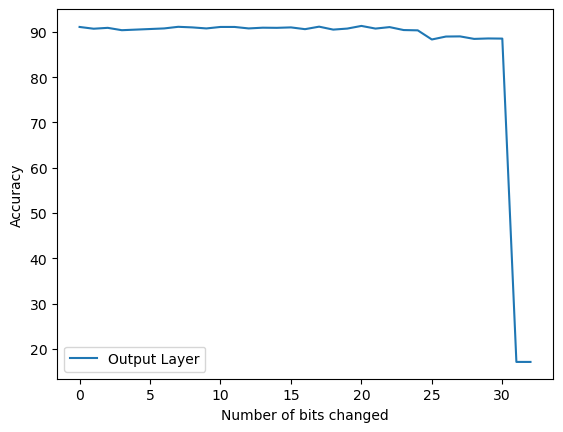

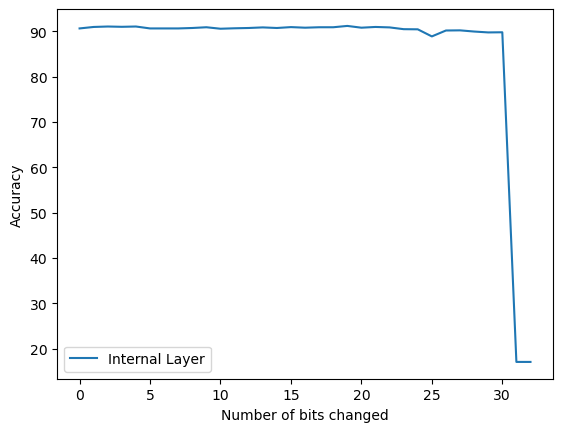

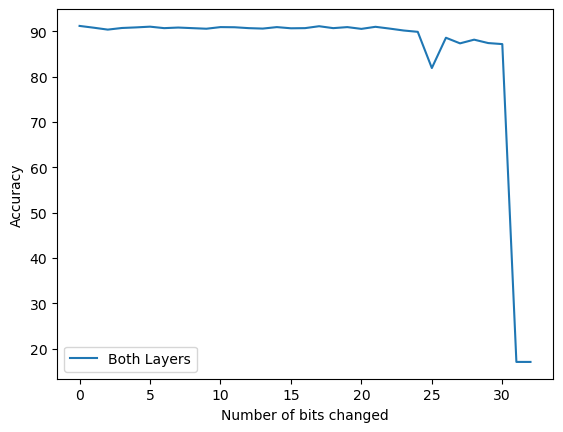

In [9]:
import copy
import matplotlib.pyplot as plt

bit_changes = list(range(33))
accuracy_output_layer = []
accuracy_internal_layer = []
accuracy_both_layers = []

# Calculate accuracy for modifying the output layer
for bit_index in bit_changes:
    # Copy the original model to avoid in-place modifications
    model_copy = copy.deepcopy(model)
    
    # Modify the weights of the output layer
    model_copy, _ = modify_weight_bit(model_copy, layer_index=2, bit_index=bit_index, new_bit='1', start_bit=0)

    # Calculate accuracy after modification
    accuracy = calculate_accuracy(model_copy, test_loader)
    accuracy_output_layer.append(accuracy)

# Plot for the output layer
plt.figure()
plt.plot(bit_changes, accuracy_output_layer, label='Output Layer')
plt.xlabel('Number of bits changed')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate accuracy for modifying the internal layer
for bit_index in bit_changes:
    # Copy the original model to avoid in-place modifications
    model_copy = copy.deepcopy(model)
    
    # Modify the weights of the internal layer
    model_copy, _ = modify_weight_bit(model_copy, layer_index=1, bit_index=bit_index, new_bit='1', start_bit=0)

    # Calculate accuracy after modification
    accuracy = calculate_accuracy(model_copy, test_loader)
    accuracy_internal_layer.append(accuracy)

# Plot for the internal layer
plt.figure()
plt.plot(bit_changes, accuracy_internal_layer, label='Internal Layer')
plt.xlabel('Number of bits changed')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate accuracy for modifying both layers
for bit_index in bit_changes:
    # Copy the original model to avoid in-place modifications
    model_copy = copy.deepcopy(model)
    
    # Modify the weights of the output and internal layers
    model_copy, _ = modify_weight_bit(model_copy, layer_index=1, bit_index=bit_index, new_bit='1', start_bit=0)
    model_copy, _ = modify_weight_bit(model_copy, layer_index=2, bit_index=bit_index, new_bit='1', start_bit=0)

    # Calculate accuracy after modification
    accuracy = calculate_accuracy(model_copy, test_loader)
    accuracy_both_layers.append(accuracy)

# Plot for both layers
plt.figure()
plt.plot(bit_changes, accuracy_both_layers, label='Both Layers')
plt.xlabel('Number of bits changed')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Bit index: 0, Accuracy: 90.07161458333333%
Bit index: 1, Accuracy: 90.07161458333333%
Bit index: 2, Accuracy: 90.13671875%
Bit index: 3, Accuracy: 89.6484375%
Bit index: 4, Accuracy: 89.84375%
Bit index: 5, Accuracy: 89.42057291666667%
Bit index: 6, Accuracy: 90.07161458333333%
Bit index: 7, Accuracy: 89.74609375%
Bit index: 8, Accuracy: 90.10416666666667%
Bit index: 9, Accuracy: 89.55078125%
Bit index: 10, Accuracy: 89.453125%
Bit index: 11, Accuracy: 89.61588541666667%
Bit index: 12, Accuracy: 90.52734375%
Bit index: 13, Accuracy: 89.55078125%
Bit index: 14, Accuracy: 89.61588541666667%
Bit index: 15, Accuracy: 89.97395833333333%
Bit index: 16, Accuracy: 90.13671875%
Bit index: 17, Accuracy: 89.51822916666667%
Bit index: 18, Accuracy: 89.42057291666667%
Bit index: 19, Accuracy: 89.84375%
Bit index: 20, Accuracy: 89.35546875%
Bit index: 21, Accuracy: 89.02994791666667%
Bit index: 22, Accuracy: 89.12760416666667%
Bit index: 23, Accuracy: 89.48567708333333%
Bit index: 24, Accuracy: 89.5

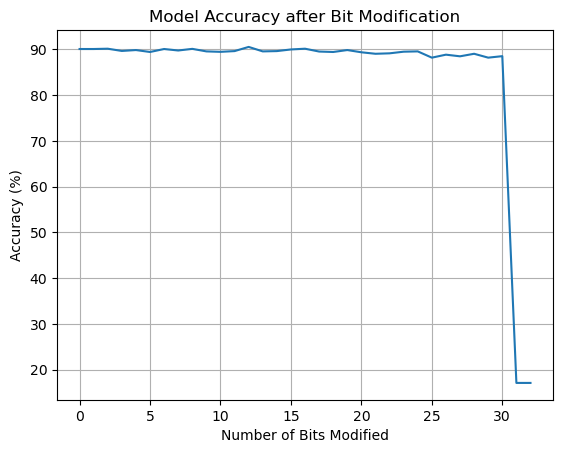

In [28]:
import matplotlib.pyplot as plt

# Define accuracy calculation function
def calculate_accuracy(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Store bit changes and corresponding accuracies
bit_changes = []
accuracies = []

# Iterate over bit indices from 0 to 32
for bit_index in range(33):
    # Modify the model's weights
    model, nbl = modify_weight_bit(model, layer_index=1, bit_index=bit_index, new_bit='1', start_bit=0)

    # Calculate accuracy after modification
    accuracy = calculate_accuracy(model, test_loader)
    print(f'Bit index: {bit_index}, Accuracy: {accuracy}%')

    # Store bit change and corresponding accuracy
    bit_changes.append(bit_index)
    accuracies.append(accuracy)

# Plot accuracy against bit changes
plt.plot(bit_changes, accuracies)
plt.xlabel('Number of Bits Modified')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy after Bit Modification')
plt.grid(True)
plt.show()
